<a href="https://colab.research.google.com/github/Mobashera-Alam/CS-5783-MachineLearning/blob/main/Assignment1/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [55]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [56]:
filename = "/content/drive/My Drive/ML/Assignment_1/Assignment1_Q2_Data.csv"
df = pd.DataFrame()
df = pd.read_csv(filename, sep = ',')
feat = df.drop(["House ID", "Price (1000$)"], axis=1)
label  = df["Price (1000$)"]
#print(type(feat))

In [58]:
feat = np.array(feat)
label = np.array(label)
print(feat.shape[1]-1)
print(label)

10
[25.9 29.5 27.9 25.9 29.9 29.9 30.9 28.9 84.9 82.9 35.9 31.5 31.  30.9
 30.  28.9 36.9 41.9 40.5 43.9 37.5 37.9 44.5 37.9 38.9 36.9 45.8 41. ]


In [59]:
def normalize(feat):  
  mu = np.mean(feat,axis=0)
  std = np.std(feat,axis=0)
  norm_feat = (feat-mu)/std
  return norm_feat
new_feat = normalize(feat)
def h(x,theta):
	return np.matmul(x, theta)

In [60]:
def cost_function(x, y, theta):
	return ((h(x, theta)-y).T@(h(x, theta)-y))/(2*y.shape[0])

In [61]:
def gradient_descent(x, y, theta, learning_rate=0.1, num_epochs=1000):
	m = x.shape[0]
	J_all = []
	for _ in range(num_epochs):
		h_x = h(x, theta)
		cost1 = (1/m)*(x.T@(h_x - y))
		theta = theta - (learning_rate)*cost1
		J_all.append(cost_function(x, y, theta))
	return theta, J_all 

In [62]:
x = normalize(feat)
y = label
print(np.shape(x))
print(np.shape(y))

(28, 11)
(28,)


In [63]:
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))

In [64]:
def test(theta,x):
  y1 = 0
  for i in range(12):
    y1 =y1+ theta[i]*x[i] 
  return y1

In [65]:
print(x[1,:])
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
#print("Cost: ", J_all)
#print("Parameters: ",theta)
print(np.shape(theta))

[ 1.         -0.75814155 -0.65094455 -1.22593778 -0.02170893  1.02976613
  0.28305246  1.02062073  1.8926624  -1.0298573  -0.38411064 -0.6882472 ]
(12, 1)


In [66]:
def plot_cost(J_all, num_epochs):
	plt.xlabel('Epochs')
	plt.ylabel('Cost')
	plt.plot(num_epochs, J_all, 'm', linewidth = "5")
	plt.show()

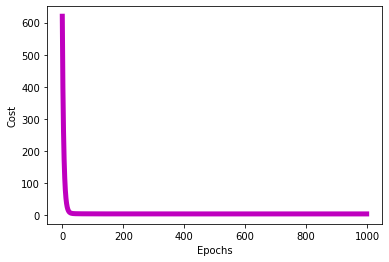

In [67]:
#for testing and plotting cost 
n_epochs = []
jplot = []
count = 0
for i in J_all:
	jplot.append(i[0][0])
	n_epochs.append(count)
	count += 1
jplot = np.array(jplot)
n_epochs = np.array(n_epochs)
cost_p = plot_cost(jplot, n_epochs)
#print('cost for last epoch:',np.min(jplot))  


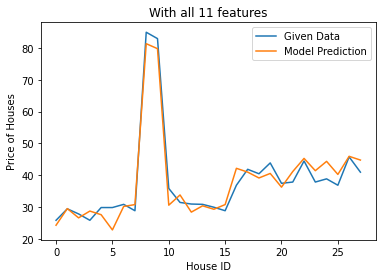

In [16]:
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y, label= 'Given Data')
plt.plot(y_pred, label = "Model Prediction")
plt.legend()
plt.title('With all 11 features')
plt.savefig('Prediction_with_features.png')

In [17]:
least_square = (y-y_pred)**2
least_square_avg = np.sum(least_square)
least_square_error = np.sqrt(least_square_avg)/y.shape[0]
print('Average Least square error(11 feat):',least_square_error)

Average Least square error(11 feat): 19.421398023157387


In [18]:
#Now we will drop each feature to obtain the least and the most important feature for our target
#this test function is for single features
def test1(theta,x):
  y1 = 0
  for i in range(len(x)):
    y1 =y1+ theta[i]*x[i] 
  return y1

In [19]:
#Local Price
feat_locp = df["Local Price"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))

(2, 1) (28, 2)


Cost of last epoch:  14.28167655421382
[[38.15714286]
 [12.83329192]]


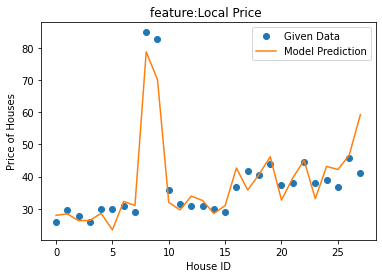

In [20]:
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Local Price ')
plt.savefig('Prediction_with_features_LocalPrice.png')
print(theta)


In [21]:
#bathrooms
feat_locp = df["Bathrooms"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))

(2, 1) (28, 2)


Cost:  13.936193166532144
[[38.15714286]
 [12.86018462]]


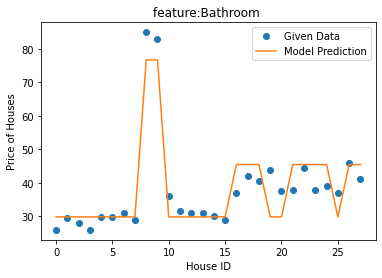

In [22]:
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Bathroom ')
plt.savefig('Prediction_with_features_Bathroom.png')
print(theta)

In [23]:
#Architecture type
feat_locp = df["Architecture type"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))

(2, 1) (28, 2)


Cost:  96.58030737704917
[[38.15714286]
 [-0.31003216]]


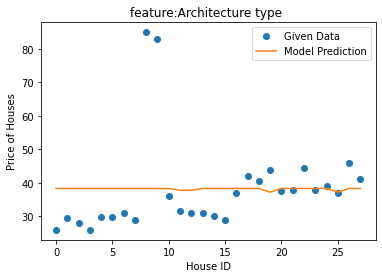

In [24]:
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Architecture type ')
plt.savefig('Prediction_with_features_Architecture type.png')
print(theta)

In [25]:
#Land Area
feat_locp = df["Land Area"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))

(2, 1) (28, 2)


Cost:  53.69398206615677
[[38.15714286]
 [ 9.26654038]]


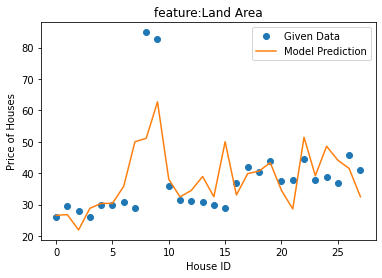

In [26]:
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Land Area')
plt.savefig('Prediction_with_features_land area.png')
print(theta)

(2, 1) (28, 2)
Cost:  14.548327680725732
[[38.15714286]
 [12.812497  ]]


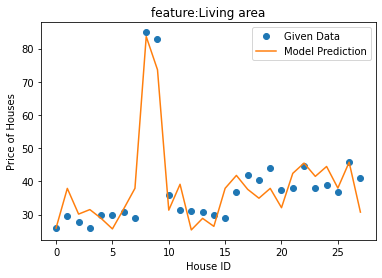

In [27]:
#Living Area
feat_locp = df["Living area"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Living area')
plt.savefig('Prediction_with_features_Living area.png')
print(theta)

(2, 1) (28, 2)
Cost of last epoch:  76.03078842536239
[[38.15714286]
 [ 6.41834541]]


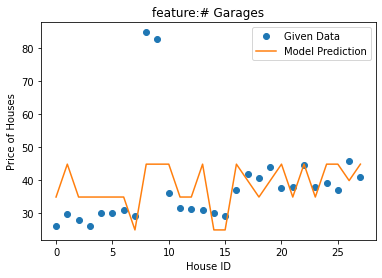

In [28]:
#Garages
feat_locp = df["# Garages"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:# Garages')
plt.savefig('Prediction_with_features_Garages.png')
print(theta)

(2, 1) (28, 2)
[[38.15714286]
 [10.80361813]]


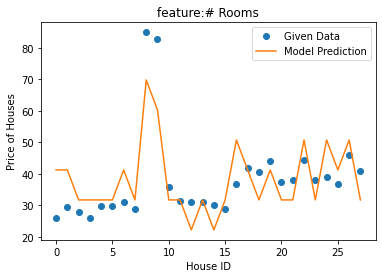

In [29]:
# Rooms
feat_locp = df["# Rooms"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
#print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:# Rooms')
plt.savefig('Prediction_with_features_Rooms.png')
print(theta)

(2, 1) (28, 2)
[[38.15714286]
 [ 9.73890877]]


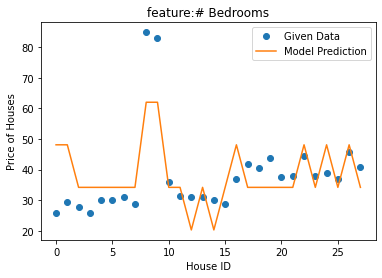

In [30]:
# Bedrooms
feat_locp = df["# Bedrooms"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
#print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:# Bedrooms')
plt.savefig('Prediction_with_features_Bedrooms.png')
print(theta)

(2, 1) (28, 2)
Cost of last epoch:  87.97250510044988
[[38.15714286]
 [-4.16073605]]


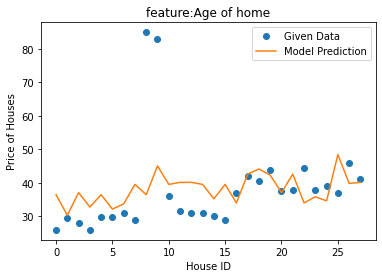

In [31]:
# Age of home
feat_locp = df["Age of home"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('feature:Age of home')
plt.savefig('Prediction_with_features_Age of home.png')
print(theta)

(2, 1) (28, 2)
Cost of last epoch:  93.74587384044526
[[38.15714286]
 [ 2.40103874]]


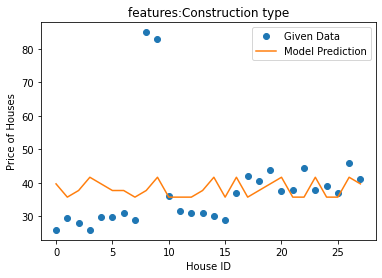

In [32]:
# Construction type
feat_locp = df["Construction type"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Construction type')
plt.savefig('Prediction_with_features_Construction type.png')
print(theta)

(2, 1) (28, 2)
Cost of last epoch:  73.4229156223893
[[38.15714286]
 [ 6.81255484]]


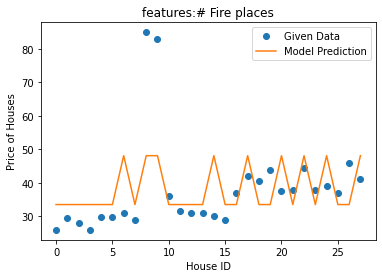

In [33]:
# Fire places
feat_locp = df["# Fire places"]
feat_locp = np.array(feat_locp)
feat_locp = np.reshape(feat_locp,(28,1))
#print(np.shape(feat_locp))
x = normalize(feat_locp)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:# Fire places')
plt.savefig('Prediction_with_features_# Fire places.png')
print(theta)

Based on the cost of the last epoch we can easily find the factor that has least effect on the final value (Architecture Type, cost:96.5803). However, the cost for three features (Living Area, Bathroom and local price seem to have pretty close cost for the last epoch. (Living area:  14.5483, Bathroom: 13.9361, Local Price: 14.2816.) So now we will build the model by dropping one feature each time and check the effect on the performance. 

(11, 1) (28, 11)
Cost of last epoch:  4.9823040645028716


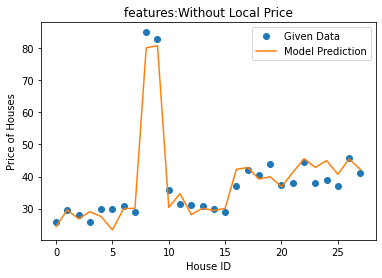

In [41]:
feat_loci = df.drop(["House ID", "Local Price","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
#print(np.shape(feat_loci))
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Local Price')
plt.savefig('Prediction_without_features_Local Price.png')
#print(theta)

(11, 1) (28, 11)
Cost of last epoch:  5.127252443767907


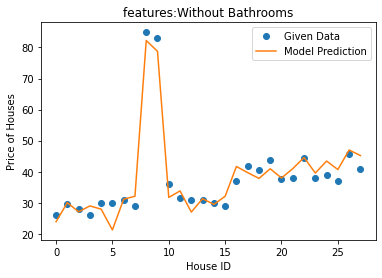

In [43]:
feat_loci = df.drop(["House ID", "Bathrooms","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Bathrooms')
plt.savefig('Prediction_without_features_Bathrooms.png')

(11, 1) (28, 11)
Cost of last epoch:  4.6933439732244695


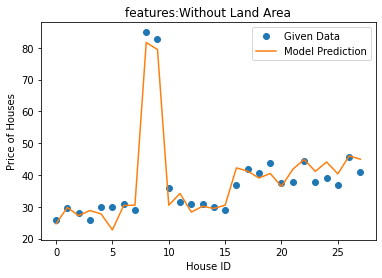

In [45]:
feat_loci = df.drop(["House ID", "Land Area","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Land Area')
plt.savefig('Prediction_without_features_Land Area.png')

(11, 1) (28, 11)
Cost of last epoch:  6.752603871642


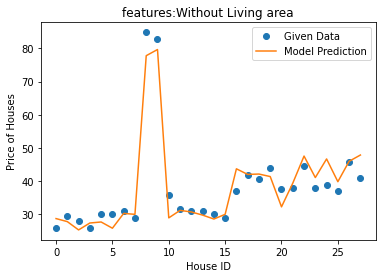

In [46]:
feat_loci = df.drop(["House ID", "Living area","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Living area')
plt.savefig('Prediction_without_features_Living area.png')

(11, 1) (28, 11)
Cost of last epoch:  5.003389780635607


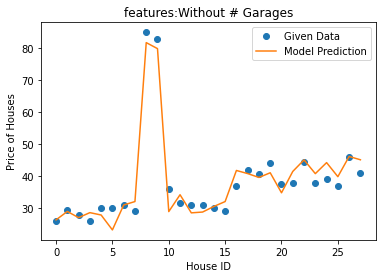

In [47]:
feat_loci = df.drop(["House ID", "# Garages","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without # Garages')
plt.savefig('Prediction_without_features_Garages.png')

(11, 1) (28, 11)
Cost of last epoch:  4.706339885355765


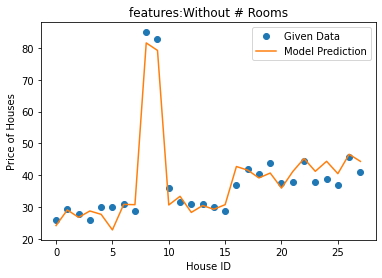

In [48]:
feat_loci = df.drop(["House ID", "# Rooms","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without # Rooms')
plt.savefig('Prediction_without_features_Rooms.png')

(11, 1) (28, 11)
Cost of last epoch:  4.659970432712897


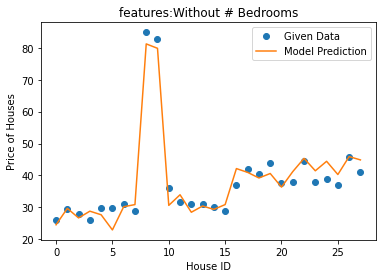

In [49]:
feat_loci = df.drop(["House ID", "# Bedrooms","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without # Bedrooms')
plt.savefig('Prediction_without_features_Bedrooms.png')

(11, 1) (28, 11)
Cost of last epoch:  4.8371462061227595


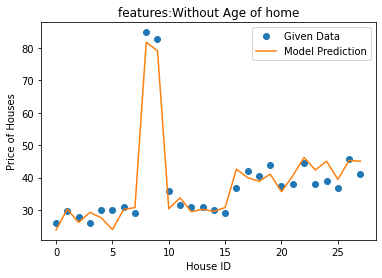

In [50]:
feat_loci = df.drop(["House ID", "Age of home","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Age of home')
plt.savefig('Prediction_without_features_Age of home.png')

(11, 1) (28, 11)
Cost of last epoch:  5.27285963833492


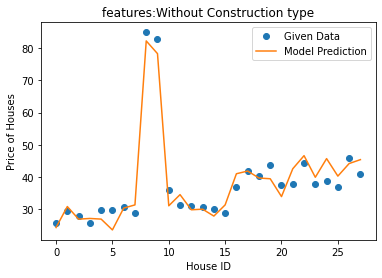

In [51]:
feat_loci = df.drop(["House ID", "Construction type","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Construction type')
plt.savefig('Prediction_without_features_Construction type.png')

(11, 1) (28, 11)
Cost of last epoch:  4.729206118866146


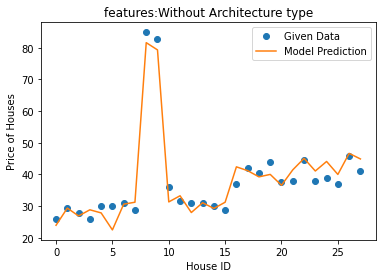

In [52]:
feat_loci = df.drop(["House ID", "Architecture type","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without Architecture type')
plt.savefig('Prediction_without_features_Architecture type.png')

(11, 1) (28, 11)
Cost of last epoch:  5.021275878744544


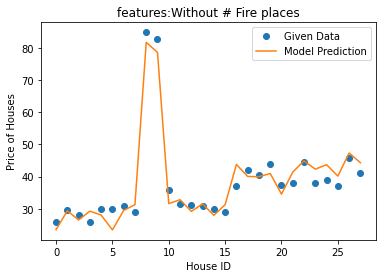

In [53]:
feat_loci = df.drop(["House ID", "# Fire places","Price (1000$)"], axis=1)
feat_loci = np.array(feat_loci)
x = normalize(feat_loci)
y = label
y = np.reshape(y, (28,1))
x = np.hstack((np.ones((x.shape[0],1)), x))
theta = np.zeros((x.shape[1], 1))
print(np.shape(theta),np.shape(x))
learning_rate = 0.1
num_epochs = 1000
theta, J_all = gradient_descent(x, y, theta, learning_rate, num_epochs)
J = cost_function(x, y, theta)
print("Cost of last epoch: ", np.min(J_all))
#print("Parameters: ",theta)
#print(np.shape(theta))
y_pred = np.zeros(x.shape[0])
for j in range(28):
  y_pred[j] = test1(theta,x[j])
#print(y_pred)
plt.xlabel('House ID')
plt.ylabel('Price of Houses')
plt.plot(y,'o', label = 'Given Data')
plt.plot(y_pred, label ='Model Prediction')
plt.legend()
plt.title('features:Without # Fire places')
plt.savefig('Prediction_without_features_Fire places.png')

Based on the model without one feature we got that without living area the cost of minimum epoch is the highest (=6.7526) compared to the rest of the models. So from this we can say that living area has the most effect on the final value.   

Q_2:(1) Average least squares error for the given data using the simple linear regression model is : 19.4213
(2) Living Area has the most effect on the final value. We tested both ways (Only using this feature and cost without this feature) and obtained the minimum cost for each model which indicated its importance on the final price. Yes we can use only this feature to predict the price and the result we obtained is pretty reasonable.
(3)Architecture type has the least effect on the final value. The cost of last epoch using this feature has the highest value(=96.5803) which clearly shows that it has the least effect on the final price. After removing this feature we obtained the minimum cost of 4.7292 which seems to have least effect on the performance of the final price. 